## Pendahuluan

Untuk mengoptimalkan biaya produksi, pabrik baja `Steelproof` memutuskan untuk mengurangi konsumsi energi pada tahap pemrosesan baja. Anda harus mengembangkan model yang dapat memprediksi suhu logam.

**Proses Pengolahan Baja**

Baja diproses dalam sendok baja yang memiliki kapasitas sekitar 100 ton. Agar sendok tahan terhadap suhu tinggi, bagian dalamnya dilapisi dengan bata tahan api. Baja cair dituang ke dalam sendok dan dipanaskan hingga mencapai suhu yang diinginkan menggunakan elektroda grafit yang terdapat pada penutupnya.

Belerang dihilangkan dari logam melalui proses desulfurisasi. Komposisi kimia baja dikoreksi (dengan menambahkan paduan berupa bongkahan logam dari bunker berisi material curah atau dengan bantuan penghantar kawat), dan sampel yang diperlukan diambil.

Sebelum elemen paduan dimasukkan, suhu baja diukur dan komposisi kimianya dianalisis. Suhu kemudian dinaikkan selama beberapa menit, elemen paduan ditambahkan, dan paduan itu sendiri dibersihkan dengan gas inert. Setelah itu, paduan diaduk dan suhunya diukur kembali. Siklus ini berulang hingga komposisi kimia yang diinginkan dan suhu cair optimal tercapai.

Baja cair kemudian dimurnikan atau dipindahkan ke mesin pengecoran kontinyu yang memadatkan baja menjadi lempengan.


**Tahapan Pengerjaan Data:**

1. Pemuatan Data
2. Pre-Processing Data
3. Exploratory Data Analysis (EDA)
4. Pembuatan Model
5. Test Data
6. Kesimpulan

**Dengan Assesment Criteria Berikut:**

1. Fitur target: Suhu Terukur Terakhir
2. Metrik: MAE
3. Kriteria Penilaian:
- MAE > 8.7 — 0 SP
- 7.6 < MAE ≤ 8.7 — 4 SP
- 6.8 < MAE ≤ 7.6 — 4.5 SP
- 6.3 < MAE ≤ 6.8 — 5 SP
- 6.0 < MAE ≤ 6.3 — 5.5 SP
- MAE ≤ 6.0 —  6 SP

## Konten

* [Pendahuluan](#intro)
* [Konten](#back)
* [Tahap 1. Mempersiapkan Dataset](#cont_1)
    * [1.1 Memuat Library](#cont_2)
    * [1.2 Memuat Dataset](#cont_3)
        * [1.2.1 Memuat Data Arc](#cont_4)
        * [1.2.2 Memuat Data Bulk](#cont_5)
        * [1.2.3 Memuat Data Bulk Time](#cont_6)
        * [1.2.4 Memuat Data Gas](#cont_7)
        * [1.2.5 Memuat Data Temp](#cont_8)
        * [1.2.6 Memuat Data Wire](#cont_9)
        * [1.2.7 Memuat Data Wire Time](#cont_10)
    * [1.3 Eksploratori Data Analisis (EDA)](#cont_11)
        * [1.3.1 Data Arc](#cont_12)
        * [1.3.2 Data Bulk](#cont_13)
        * [1.3.3 Memuat Data Gas](#cont_14)
        * [1.3.4 Memuat Data Temp](#cont_15)
        * [1.3.5 Memuat Data Wire](#cont_16)
* [Tahap 2. Menyiapkan Data Train dan Data Test](#cont_17)
* [Tahap 3. Pemodelan Data](#cont_18)
    * [3.1 Decision Tree Regressor](#cont_19)
    * [3.2 Random Forest Regressor](#cont_20)
    * [3.3 Gradient Boosting Machines (GBM)](#cont_21)
    * [3.4 Random Forest Regressor dengan Hyperparameter](#cont_22)
* [Tahap 4. Test Data](#cont_23)
* [Tahap 5. Kesimpulan umum](#cont_24)

##  1. Mempersiapkan Dataset

Tahap pertama yang perlu dilakukan adalah mempersiapkan dataset mulai dari memuat library yang diperlukan, memuat dataset , mengecek sampel data, mengecek nilai yang hilang, mengecek duplikat dan mengecek tipe data.

### 1.1 Memuat Library

Sebelumnya kita akan menggunakan beberapa library berikut:
- `Pandas`: Untuk manipulasi dan analisis data.
- `Scikit-learn`: Untuk pemodelan dan evaluasi model.
- `Matplotlib dan Seaborn`: Untuk visualisasi data.
- `NumPy`: Untuk operasi matematika.

In [1]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Memuat Dataset

Disini kita memiliki beberapa data set yang harus kita muat, dan kita akan lakukan satu-satu.

- `data_arc.csv` — electrode data
- `data_bulk.csv` — bulk material supply data (volume)
- `data_bulk_time.csv` — bulk material delivery data (time)
- `data_gas.csv` — gas purge data
- `data_temp.csv` — temperature measurement results
- `data_wire.csv` — wire materials data (volume)
- `data_wire_time.csv` — wire materials data (time)

Di setiap file, kolom kunci berisi nomor batch.
Mungkin ada beberapa baris dengan nilai key yang sama dalam file-file tersebut. Nilai-nilai ini sesuai dengan iterasi pengolahan yang berbeda.

#### 1.2.1 Memuat Data Arc

In [2]:
df1 = pd.read_csv('datasets/final_steel/data_arc_en.csv')

In [3]:
# Cek Info Data

df1.info()

# Cek Sample Data
df1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                14876 non-null  int64  
 1   Arc heating start  14876 non-null  object 
 2   Arc heating end    14876 non-null  object 
 3   Active power       14876 non-null  float64
 4   Reactive power     14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


,key,Arc heating start,Arc heating end,Active power,Reactive power
9408,2040,2019-07-21 05:40:12,2019-07-21 05:41:24,0.320320,0.221805
8178,1777,2019-07-05 11:58:45,2019-07-05 12:03:39,1.124982,0.792309
1126,243,2019-05-12 08:38:16,2019-05-12 08:41:31,0.748898,0.500410
12146,2640,2019-08-11 02:37:45,2019-08-11 02:40:51,0.723765,0.505844
1948,420,2019-05-18 23:20:36,2019-05-18 23:21:45,0.295130,0.206232
8275,1802,2019-07-06 08:31:18,2019-07-06 08:33:21,0.377717,0.560863
4041,869,2019-06-04 15:47:23,2019-06-04 15:50:17,0.641899,0.603997
2114,454,2019-05-20 04:13:34,2019-05-20 04:17:40,1.075532,0.799409
14167,3079,2019-08-26 23:08:50,2019-08-26 23:10:52,0.432537,0.309735
6097,1329,2019-06-20 02:49:22,2019-06-20 02:51:52,0.740212,0.428817


Data terdiri dari kolom-kolom berikut:

- `key`: Nomor identifikasi unik untuk setiap batch atau iterasi pengolahan.
- `Arc heating start`: Waktu mulai pemanasan busur listrik.
- `Arc heating end`: Waktu akhir pemanasan busur listrik.
- `Active power`: Jumlah daya aktif yang digunakan selama pengolahan.
- `Reactive power`: Jumlah daya reaktif yang digunakan selama pengolahan.

Kolom-kolom ini memberikan informasi tentang proses pengolahan, termasuk waktu dan daya yang digunakan untuk setiap batch atau iterasi.

Dan juga`data_arc` terdiri dari `14876 baris` dan `5 kolom`. Kita lanjutkan cek apakah ada nilai yang hilang.

In [4]:
# Cek apakah ada data nilai yang hilang

df1_missed = df1.isna().sum().to_frame()
df1_missed = df1_missed.rename(columns={0: 'missing_values'})
df1_missed['% of total'] = (df1_missed['missing_values'] / df1.shape[0]).round(2)
df1_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
key,0,0.0
Arc heating start,0,0.0
Arc heating end,0,0.0
Active power,0,0.0
Reactive power,0,0.0


Tidak ditemukan nilai yang hilang pada `data_arc`. Kita lanjutkan cek data duplikasi.

In [5]:
# Cek apakah ada duplikasi
df1.duplicated().sum()

0

Tidak ditemukan juga data duplikasi pada `data_arc`.

Selanjutkan kita akan mengubah format type data pada `Arc heating start` dan `Arc heating end` dari `object` menjadi `time and date`.

In [6]:
# Mengubah tipe data kolom 'Arc heating start' dan 'Arc heating end' menjadi datetime
df1['Arc heating start'] = pd.to_datetime(df1['Arc heating start'])
df1['Arc heating end'] = pd.to_datetime(df1['Arc heating end'])

# Menampilkan informasi tipe data setelah perubahan
df1.info()

# Menampilkan sample data kembali
df1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                14876 non-null  int64         
 1   Arc heating start  14876 non-null  datetime64[ns]
 2   Arc heating end    14876 non-null  datetime64[ns]
 3   Active power       14876 non-null  float64       
 4   Reactive power     14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


,key,Arc heating start,Arc heating end,Active power,Reactive power
5510,1198,2019-06-15 18:06:18,2019-06-15 18:08:17,0.473047,0.346186
9701,2102,2019-07-23 07:36:16,2019-07-23 07:37:24,0.308554,0.191848
12651,2749,2019-08-15 03:46:36,2019-08-15 03:48:52,0.557647,0.412206
5458,1187,2019-06-15 09:30:07,2019-06-15 09:31:02,0.184296,0.139708
4418,951,2019-06-07 13:52:24,2019-06-07 13:56:23,1.069776,0.750899
11315,2465,2019-08-04 21:11:08,2019-08-04 21:13:23,0.353088,0.484082
4476,963,2019-06-07 21:42:30,2019-06-07 21:45:31,0.776865,0.554716
4304,924,2019-06-06 10:10:20,2019-06-06 10:12:34,0.465491,0.337786
12752,2770,2019-08-16 00:35:22,2019-08-16 00:39:11,0.895208,0.571361
11964,2603,2019-08-09 18:28:26,2019-08-09 18:32:53,0.705344,0.588275


Kita sudah berhasil mengubah tipe data pada `Arc heating start` dan `Arc heating end` dari `object` menjadi `time and date`. Kita lanjutkan ke memuat data berikutnya.

#### 1.2.2 Memuat Data Bulk

In [7]:
df2 = pd.read_csv('datasets/final_steel/data_bulk_en.csv')

In [8]:
# Cek Info Data

df2.info()

# Cek Sample Data
df2.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.3 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1043,1089,NaN,NaN,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,433,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,155.0,155.0
977,1022,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,155.0,NaN,152.0,103.0
2621,2720,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.0,NaN,102.0,108.0
2726,2829,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414.0,NaN,200.0,106.0
932,975,27.0,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.0,NaN
640,671,27.0,NaN,NaN,241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.0,NaN,255.0,153.0
2956,3065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,NaN,130.0,206.0
1572,1631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,120.0,206.0
799,834,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,NaN,197.0,203.0


`Data_bulk` terdiri dari `3129 baris` dan `16 kolom`. Dan dari sample data terlihat banyak sekali data yang hilang, mari kita pastikan kembali nilai yang hilang.

In [9]:
# Cek apakah ada data nilai yang hilang

df2_missed = df2.isna().sum().to_frame()
df2_missed = df2_missed.rename(columns={0: 'missing_values'})
df2_missed['% of total'] = (df2_missed['missing_values'] / df2.shape[0]).round(2)
df2_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
Bulk 8,3128,1.00
Bulk 13,3111,0.99
Bulk 9,3110,0.99
Bulk 2,3107,0.99
Bulk 7,3104,0.99
Bulk 5,3052,0.98
Bulk 10,2953,0.94
Bulk 11,2952,0.94
Bulk 1,2877,0.92
Bulk 6,2553,0.82


Dari semua data terlihat bahwa dari kolom `Bulk 1 hingga Bulk 15` semuanya mempunyai nilai yang hilang, dan pada `Bulk 8` nilai yang hilang berada pada semua baris. Kita akan mengisi nilai yang hilang ini dengan median untuk memudahkan pengisian data, karena banyaknya data yang hilang.

In [10]:
# Isi nilai yang hilang dengan nilai median
df2.fillna(df2.median(), inplace=True)

In [11]:
# Cetak DataFrame setelah pengisian nilai yang hilang
df2

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,31.0,251.5,97.5,43.0,86.0,100.0,298.0,49.0,68.0,86.5,64.0,206.0,155.5,150.0,154.0
1,2,31.0,251.5,97.5,73.0,86.0,100.0,298.0,49.0,68.0,86.5,64.0,206.0,155.5,149.0,154.0
2,3,31.0,251.5,97.5,34.0,86.0,100.0,298.0,49.0,68.0,86.5,64.0,205.0,155.5,152.0,153.0
3,4,31.0,251.5,97.5,81.0,86.0,100.0,298.0,49.0,68.0,86.5,64.0,207.0,155.5,153.0,154.0
4,5,31.0,251.5,97.5,78.0,86.0,100.0,298.0,49.0,68.0,86.5,64.0,203.0,155.5,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,31.0,251.5,170.0,102.0,86.0,100.0,298.0,49.0,68.0,86.5,64.0,252.0,155.5,130.0,206.0
3125,3238,31.0,251.5,126.0,102.0,86.0,100.0,298.0,49.0,68.0,86.5,64.0,254.0,155.5,108.0,106.0
3126,3239,31.0,251.5,97.5,102.0,86.0,114.0,298.0,49.0,68.0,86.5,64.0,158.0,155.5,270.0,88.0
3127,3240,31.0,251.5,97.5,102.0,86.0,26.0,298.0,49.0,68.0,86.5,64.0,208.0,155.5,192.0,54.0


In [12]:
# Cek apakah ada data nilai yang hilang

df2_missed = df2.isna().sum().to_frame()
df2_missed = df2_missed.rename(columns={0: 'missing_values'})
df2_missed['% of total'] = (df2_missed['missing_values'] / df2.shape[0]).round(2)
df2_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
key,0,0.0
Bulk 1,0,0.0
Bulk 2,0,0.0
Bulk 3,0,0.0
Bulk 4,0,0.0
Bulk 5,0,0.0
Bulk 6,0,0.0
Bulk 7,0,0.0
Bulk 8,0,0.0
Bulk 9,0,0.0


Sekarang kita sudah tidak mempunyai nilai yang hilang pada `data_bulk`. KIta cek duplikasi datanya.

In [13]:
#Cek data yang duplikat pada df2
df2.duplicated().sum()

0

Sekarang sudah tidak ada lagi duplikat, dan untuk tipe datanya sudah benar, tidak perlu ada yang kita rubah. Kita lanjutkan data berikutnya.

#### 1.2.3 Memuat Data Bulk Time

In [14]:
df3 = pd.read_csv('datasets/final_steel/data_bulk_time_en.csv')

In [15]:
# Cek Info Data

df3.info()

# Cek Sample Data
df3.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.3+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-04 01:44:28,NaN
2747,2850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-18 18:21:20,NaN
1514,1572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-29 00:03:41,NaN,2019-06-29 00:03:41,2019-06-29 00:03:41
1029,1075,NaN,NaN,2019-06-11 17:27:29,2019-06-11 17:38:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-11 17:23:04,NaN,2019-06-11 17:23:04,2019-06-11 17:23:04
101,114,NaN,2019-05-07 10:05:35,NaN,NaN,2019-05-07 10:05:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2886,2992,NaN,NaN,NaN,2019-08-24 00:28:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-24 00:21:24,NaN,2019-08-24 00:21:24,2019-08-24 00:21:24
1136,1184,NaN,NaN,NaN,NaN,NaN,2019-06-15 07:43:52,NaN,NaN,NaN,NaN,NaN,2019-06-15 07:28:27,NaN,2019-06-15 07:28:27,2019-06-15 07:28:27
385,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-18 15:40:59,NaN,2019-05-18 15:40:59,2019-05-18 15:40:59
3053,3162,NaN,NaN,2019-08-29 10:42:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-29 10:28:28,NaN,2019-08-29 10:28:28,2019-08-29 10:28:28
155,169,NaN,NaN,2019-05-09 16:40:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-09 16:24:50,NaN,2019-05-09 16:24:50,2019-05-09 16:24:50


`Data Bulk Time` terdiri dari 3129 baris dan 16 kolom. KIta cek kembali berapa banyak data yang hilamg.

In [16]:
# Cek apakah ada data nilai yang hilang

df3_missed = df3.isna().sum().to_frame()
df3_missed = df3_missed.rename(columns={0: 'missing_values'})
df3_missed['% of total'] = (df3_missed['missing_values'] / df3.shape[0]).round(2)
df3_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
Bulk 8,3128,1.00
Bulk 13,3111,0.99
Bulk 9,3110,0.99
Bulk 2,3107,0.99
Bulk 7,3104,0.99
Bulk 5,3052,0.98
Bulk 10,2953,0.94
Bulk 11,2952,0.94
Bulk 1,2877,0.92
Bulk 6,2553,0.82


Dari data yang hilang pada `Data Bulk Time` nilai yang hilang jumlahnya sama dengan data yang hilang pada `Data Bulk`, maka kita akan mengisi nilai yang hilang ini dengan median, agar sama dengan `Data Bulk`. Namun, kita akan rubah dahulu tipe data untuk kolom `bulk 1 - bulk 15` dari `object menjadi datetime`.

In [17]:
# Membaca DataFrame dari sumber data
df3 = pd.read_csv('datasets/final_steel/data_bulk_time_en.csv')

# Daftar kolom Bulk 1 hingga Bulk 15
bulk_columns = ['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5',
                'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10',
                'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']

# Mengonversi tipe data kolom tanggal menjadi datetime
df3[bulk_columns] = df3[bulk_columns].apply(pd.to_datetime)

# Menampilkan informasi tipe data setelah perubahan
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.3 KB
None


Saat ini sudah berhasil mengubah tipe data, kita lanjutkan.

In [18]:
# Isi nilai yang hilang dengan nilai median
df3.fillna(df3.median(), inplace=True)

In [19]:
df3

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-07-01 17:13:22,2019-05-03 11:21:30.000,2019-07-21 23:25:54,2019-07-06 03:56:28.500,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-05-03 11:03:52,2019-06-28 22:21:35,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-07-01 17:13:22,2019-05-03 11:46:38.000,2019-07-21 23:25:54,2019-07-06 03:56:28.500,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-05-03 11:40:20,2019-06-28 22:21:35,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-07-01 17:13:22,2019-05-03 12:31:06.000,2019-07-21 23:25:54,2019-07-06 03:56:28.500,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-05-03 12:09:40,2019-06-28 22:21:35,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-07-01 17:13:22,2019-05-03 12:48:43.000,2019-07-21 23:25:54,2019-07-06 03:56:28.500,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-05-03 12:41:24,2019-06-28 22:21:35,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-07-01 17:13:22,2019-05-03 13:18:50.000,2019-07-21 23:25:54,2019-07-06 03:56:28.500,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-05-03 13:12:56,2019-06-28 22:21:35,2019-05-03 13:12:56,2019-05-03 13:12:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-08-31 22:51:28,2019-06-25 18:44:37.500,2019-07-21 23:25:54,2019-07-06 03:56:28.500,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-08-31 22:46:52,2019-06-28 22:21:35,2019-08-31 22:46:52,2019-08-31 22:46:52
3125,3238,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-08-31 23:39:11,2019-06-25 18:44:37.500,2019-07-21 23:25:54,2019-07-06 03:56:28.500,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-08-31 23:33:09,2019-06-28 22:21:35,2019-08-31 23:33:09,2019-08-31 23:33:09
3126,3239,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-07-01 17:13:22,2019-06-25 18:44:37.500,2019-07-21 23:25:54,2019-09-01 01:51:58.000,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-09-01 01:39:41,2019-06-28 22:21:35,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,2019-06-23 02:31:45.500,2019-07-23 15:06:49.500,2019-07-01 17:13:22,2019-06-25 18:44:37.500,2019-07-21 23:25:54,2019-09-01 03:12:40.000,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500,2019-07-20 18:08:09,2019-06-30 09:36:04,2019-06-28 22:21:35,2019-09-01 02:41:27,2019-09-01 02:41:27


In [20]:
# Cek apakah masih ada data nilai yang hilang

df3_missed = df3.isna().sum().to_frame()
df3_missed = df3_missed.rename(columns={0: 'missing_values'})
df3_missed['% of total'] = (df3_missed['missing_values'] / df3.shape[0]).round(2)
df3_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
key,0,0.0
Bulk 1,0,0.0
Bulk 2,0,0.0
Bulk 3,0,0.0
Bulk 4,0,0.0
Bulk 5,0,0.0
Bulk 6,0,0.0
Bulk 7,0,0.0
Bulk 8,0,0.0
Bulk 9,0,0.0


Sekarang kita sudah tidak mempunyai nilai yang hilang pada `Data Bulk Time`. Kita lanjutkan cek duplikasinya.

In [21]:
#Cek data yang duplikat pada df3
df3.duplicated().sum()

0

Dan setelah kita cek tidak ditemukan data duplikat pada `Data Bulk Time`. Kita lanjutkan pengecekan ke data selanjutnya.

#### 1.2.4 Memuat Data Gas

In [22]:
df4 = pd.read_csv('datasets/final_steel/data_gas_en.csv')

In [23]:
# Cek Info Data

df4.info()

# Cek Sample Data
df4.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Gas 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,Gas 1
692,695,11.435276
2273,2276,5.695736
1255,1258,13.872219
1701,1704,5.283310
474,477,6.203306
752,755,9.173081
1446,1449,7.792234
1770,1773,5.208462
1565,1568,3.579623
1385,1388,7.430081


`Data Gas` terdiri `3239 baris dan 2 kolom`. Kita lanjutkan cek nilai yang hilang.

In [24]:
# Cek apakah ada data nilai yang hilang

df4_missed = df4.isna().sum().to_frame()
df4_missed = df4_missed.rename(columns={0: 'missing_values'})
df4_missed['% of total'] = (df4_missed['missing_values'] / df4.shape[0]).round(2)
df4_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
key,0,0.0
Gas 1,0,0.0


Kita lihat ridak ada nilai yang hilang pada `Data Gas`. Kita lanjutkan cek data duplikat.

In [25]:
#Cek data yang duplikat pada df4
df4.duplicated().sum()

0

Dalam `Data Gas` juga tidak terdapat data duplikat, dan tipe data yang tampil sudah benar, maka kita lanjutkan pengecekan ke data selanjutnya.

#### 1.2.5 Memuat Data Temp

In [26]:
df5 = pd.read_csv('datasets/final_steel/data_temp_en.csv')

In [27]:
# Cek Info Data

df5.info()

# Cek Sample Data
df5.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            15907 non-null  int64  
 1   Sampling time  15907 non-null  object 
 2   Temperature    13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


,key,Sampling time,Temperature
6509,1317,2019-06-19 17:49:18,1569.0
11768,2396,2019-08-02 14:38:57,1581.0
11133,2264,2019-07-28 16:43:27,1558.0
6192,1250,2019-06-17 15:08:35,1593.0
8041,1638,2019-06-30 23:41:15,1570.0
2043,383,2019-05-17 19:07:32,1606.0
9839,1993,2019-07-19 12:34:34,1588.0
13491,2742,2019-08-14 23:00:27,NaN
15635,3177,2019-08-30 02:43:39,NaN
8360,1697,2019-07-02 21:04:32,1589.0


`Data Temp` terdiri dari `15907 baris dan 3 kolom`. Kita cek data yang hilang.

In [28]:
# Cek apakah ada data nilai yang hilang

df5_missed = df5.isna().sum().to_frame()
df5_missed = df5_missed.rename(columns={0: 'missing_values'})
df5_missed['% of total'] = (df5_missed['missing_values'] / df5.shape[0]).round(2)
df5_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
Temperature,2901,0.18
key,0,0.00
Sampling time,0,0.00


Terdapat `2901` data yang hilang. Kita akan mengisi data yang hilang dengan nilai median. Namun, sebelumnya kita rubah dulu kolom `Sampling Time` dari tipe `object menjadi datetime`.

In [29]:
# Mengonversi tipe data kolom "Sampling time" menjadi datetime
df5['Sampling time'] = pd.to_datetime(df5['Sampling time'])

# Menampilkan informasi tipe data setelah perubahan
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   key            15907 non-null  int64         
 1   Sampling time  15907 non-null  datetime64[ns]
 2   Temperature    13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [30]:
# Isi nilai yang hilang dengan nilai median
df5.fillna(df5.median(), inplace=True)

In [31]:
# Cetak DataFrame setelah pengisian nilai yang hilang
df5

,key,Sampling time,Temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
15902,3241,2019-09-01 04:03:30,1586.0
15903,3241,2019-09-01 04:16:12,1591.0
15904,3241,2019-09-01 04:22:39,1591.0
15905,3241,2019-09-01 04:33:42,1591.0


In [32]:
# Cek apakah ada data nilai yang hilang

df5_missed = df5.isna().sum().to_frame()
df5_missed = df5_missed.rename(columns={0: 'missing_values'})
df5_missed['% of total'] = (df5_missed['missing_values'] / df5.shape[0]).round(2)
df5_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
key,0,0.0
Sampling time,0,0.0
Temperature,0,0.0


Sekarang sudah tidak terdapat lagi nilai yang hilang, kita lanjutkan cek duplikat.

In [33]:
#Cek data yang duplikat pada df4
df5.duplicated().sum()

0

Saat ini sudah tidak ada data duplikat, kita lanjutkan ke data selanjutnya.

#### 1.2.6 Memuat Data Wire

In [34]:
df6 = pd.read_csv('datasets/final_steel/data_wire_en.csv')

In [35]:
# Cek Info Data

df6.info()

# Cek Sample Data
df6.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
554,589,151.070404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,437,119.199600,67.105999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166,1234,157.107605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,108,84.564476,12.143040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2347,2473,165.852961,23.132721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,2709,117.106079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1821,1911,115.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2133,2243,58.050720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,769,222.300003,0.090480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465,1541,119.059200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`Data Wire` terdiri dari `3081 baris dan 10 kolom`, dan terdapat banyak data hilang, kita cek detailnya.

In [36]:
# Cek apakah ada data nilai yang hilang

df6_missed = df6.isna().sum().to_frame()
df6_missed = df6_missed.rename(columns={0: 'missing_values'})
df6_missed['% of total'] = (df6_missed['missing_values'] / df6.shape[0]).round(2)
df6_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
Wire 5,3080,1.00
Wire 7,3070,1.00
Wire 4,3067,1.00
Wire 8,3062,0.99
Wire 9,3052,0.99
Wire 3,3018,0.98
Wire 6,3008,0.98
Wire 2,2002,0.65
Wire 1,26,0.01
key,0,0.00


Terlihat bahwa dari `wire 1 - wire 9` banyak terdapat nilai yang hilang, kita akan mengisi nilai yang hilang dengan nilai median sama dengan sebelumnya.

In [37]:
# Isi nilai yang hilang dengan nilai median
df6.fillna(df6.median(), inplace=True)

In [38]:
# Cetak DataFrame setelah pengisian nilai yang hilang
df6

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
1,2,96.052315,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
2,3,91.160157,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
3,4,89.063515,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
4,5,89.238236,9.114560,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
3077,3238,56.128799,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
3078,3239,143.357761,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
3079,3240,34.070400,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399


In [39]:
# Cek apakah ada data nilai yang hilang

df6_missed = df6.isna().sum().to_frame()
df6_missed = df6_missed.rename(columns={0: 'missing_values'})
df6_missed['% of total'] = (df6_missed['missing_values'] / df6.shape[0]).round(2)
df6_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
key,0,0.0
Wire 1,0,0.0
Wire 2,0,0.0
Wire 3,0,0.0
Wire 4,0,0.0
Wire 5,0,0.0
Wire 6,0,0.0
Wire 7,0,0.0
Wire 8,0,0.0
Wire 9,0,0.0


Sekarang sudah tidak ditemukan nilai yang hilang pada `Data Wire`. Kita cek data duplikat.

In [40]:
#Cek data yang duplikat pada df3
df6.duplicated().sum()

0

`Data Wire` juga tidak mampunyai data duplikat, dan untuk tipe data pada `Data Wire` juga sudah sesuai kita lanjutkan ke data selanjutnya.

#### 1.2.7 Memuat Data Wire Time

In [41]:
df7 = pd.read_csv('datasets/final_steel/data_wire_time_en.csv')

In [42]:
# Cek Info Data

df7.info()

# Cek Sample Data
df7.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2447,2574,2019-08-08 21:50:21,NaN,NaN,NaN,NaN,2019-08-08 22:02:01,NaN,NaN,NaN
1193,1261,2019-06-17 22:26:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2460,2587,2019-08-09 08:21:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,2742,2019-08-14 22:29:52,2019-08-14 22:30:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2538,2671,2019-08-12 06:44:08,2019-08-12 06:44:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2602,2736,2019-08-14 10:10:21,2019-08-14 10:11:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2891,3050,2019-08-26 00:45:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2981,3140,2019-08-28 19:12:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,34,2019-05-04 13:40:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,615,2019-05-26 00:52:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`Data Wire Time` terdiri dari `3081 baris dan 10 kolom`, dan terdapat banyak data hilang, kita cek detailnya.

In [43]:
# Cek apakah ada data nilai yang hilang

df7_missed = df7.isna().sum().to_frame()
df7_missed = df7_missed.rename(columns={0: 'missing_values'})
df7_missed['% of total'] = (df7_missed['missing_values'] / df7.shape[0]).round(2)
df7_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
Wire 5,3080,1.00
Wire 7,3070,1.00
Wire 4,3067,1.00
Wire 8,3062,0.99
Wire 9,3052,0.99
Wire 3,3018,0.98
Wire 6,3008,0.98
Wire 2,2002,0.65
Wire 1,26,0.01
key,0,0.00


Nilai yang hilang pada `Data Wire Time` sama dengan di `Data Wire`, maka kita akan perlakukan proses yang sama. Kita isi nilai yang hilang dengan median, pada `Wire 1 - Wire 9`. Namun sebelumnya kita rubah tipe datanya dulu dari `object menjadi datetime`.

In [44]:
# Membaca DataFrame dari sumber data
df7 = pd.read_csv('datasets/final_steel/data_wire_time_en.csv')

# Daftar kolom 'Wire 1' hingga 'Wire 9'
wire_columns = ['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']

# Mengonversi nilai dalam kolom 'Wire 1' hingga 'Wire 9' menjadi datetime, jika memungkinkan
for column in wire_columns:
    df7[column] = pd.to_datetime(df7[column], errors='coerce')

# Menampilkan informasi tipe data setelah perubahan
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [45]:
# Isi nilai yang hilang dengan nilai median
df7.fillna(df7.median(), inplace=True)

In [46]:
df7

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
1,2,2019-05-03 11:46:10,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
2,3,2019-05-03 12:13:47,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
3,4,2019-05-03 12:48:05,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-08-31 22:50:20,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
3077,3238,2019-08-31 23:38:24,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
3078,3239,2019-09-01 01:50:43,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00
3079,3240,2019-09-01 03:12:02,2019-07-02 06:40:13,2019-07-17 21:35:47,2019-07-23 10:44:22.500,2019-08-08 16:01:07,2019-07-24 03:28:47,2019-08-08 10:43:30,2019-05-14 05:14:25,2019-06-09 10:26:00


In [47]:
# Cek apakah ada data nilai yang hilang

df7_missed = df7.isna().sum().to_frame()
df7_missed = df7_missed.rename(columns={0: 'missing_values'})
df7_missed['% of total'] = (df7_missed['missing_values'] / df7.shape[0]).round(2)
df7_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
key,0,0.0
Wire 1,0,0.0
Wire 2,0,0.0
Wire 3,0,0.0
Wire 4,0,0.0
Wire 5,0,0.0
Wire 6,0,0.0
Wire 7,0,0.0
Wire 8,0,0.0
Wire 9,0,0.0


Sekarang sudah tidak ditemukan data yang hilang pada `Data Wire Time`. Kita cek duplikat datanya.

In [48]:
#Cek data yang duplikat pada df3
df7.duplicated().sum()

0

Tidak ditemukan duplikat data, maka kita akan lanjutkan ke langkah analisa selanjutnya.

### 1.3 Exploratori Data Analisis (EDA)

Setelah kita selesai melakukan pre-processing, kita akan melakukan proses lanjutan dengan EDA secara visual, untuk menentukan langkah analisa selanjutnya.

#### 1.3.1 Data Arc

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


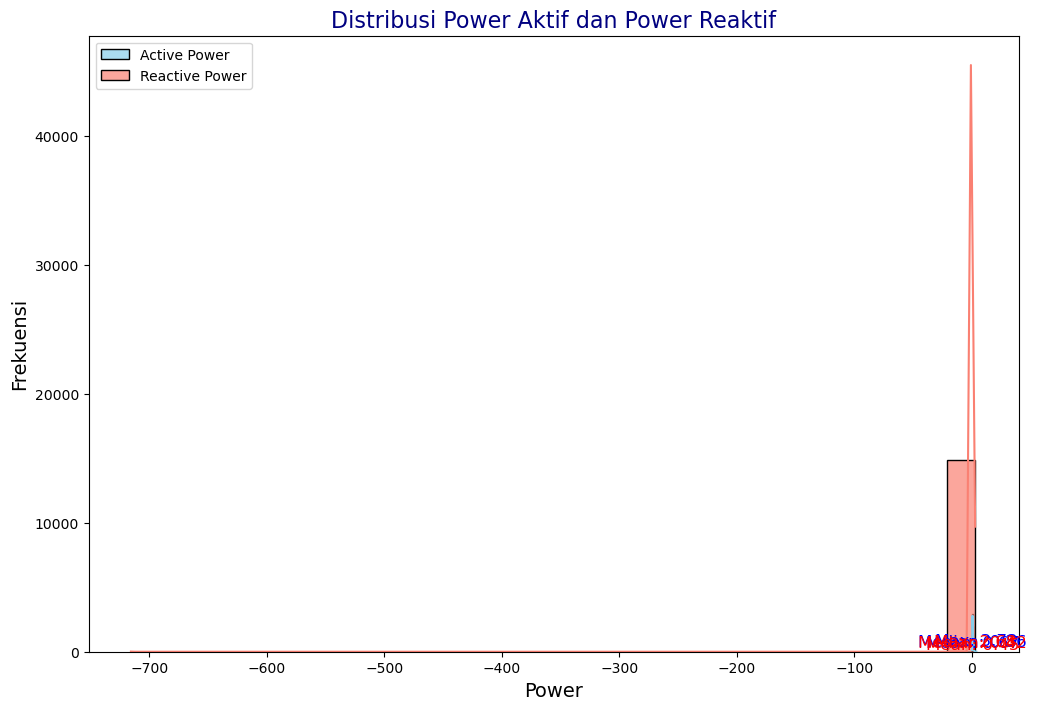

In [49]:
# EDA visual untuk df1 (data_arc_en.csv)
plt.figure(figsize=(12, 8))
sns.histplot(data=df1['Active power'], bins=30, kde=True, color='skyblue', alpha=0.7, label='Active Power')
sns.histplot(data=df1['Reactive power'], bins=30, kde=True, color='salmon', alpha=0.7, label='Reactive Power')
plt.title('Distribusi Power Aktif dan Power Reaktif', fontsize=16, color='navy')
plt.xlabel('Power', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.legend()

# Menambahkan anotasi untuk Active Power
mean_active = df1['Active power'].mean()
median_active = df1['Active power'].median()
max_active = df1['Active power'].max()
plt.text(mean_active, 300, f'Mean: {mean_active:.2f}', fontsize=12, ha='center', color='blue')
plt.text(median_active, 400, f'Median: {median_active:.2f}', fontsize=12, ha='center', color='blue')
plt.text(max_active, 500, f'Max: {max_active:.2f}', fontsize=12, ha='center', color='blue')

# Menambahkan anotasi untuk Reactive Power
mean_reactive = df1['Reactive power'].mean()
median_reactive = df1['Reactive power'].median()
max_reactive = df1['Reactive power'].max()
plt.text(mean_reactive, 200, f'Mean: {mean_reactive:.2f}', fontsize=12, ha='center', color='red')
plt.text(median_reactive, 300, f'Median: {median_reactive:.2f}', fontsize=12, ha='center', color='red')
plt.text(max_reactive, 400, f'Max: {max_reactive:.2f}', fontsize=12, ha='center', color='red')

plt.show()

Gambar menunjukkan sebaran daya aktif dan reaktif pada sistem tenaga listrik. Titik-titik mewakili kombinasi nilai daya yang diukur. Mayoritas nilai berada di area biru (daya aktif dan reaktif positif), menunjukkan bahwa sistem umumnya beroperasi dengan daya positif. Daya aktif umumnya lebih tinggi daripada daya reaktif, dan terdapat beberapa nilai daya reaktif negatif. yang negatif. yang negatif. yang negatif.

#### 1.3.2 Data Bulk

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

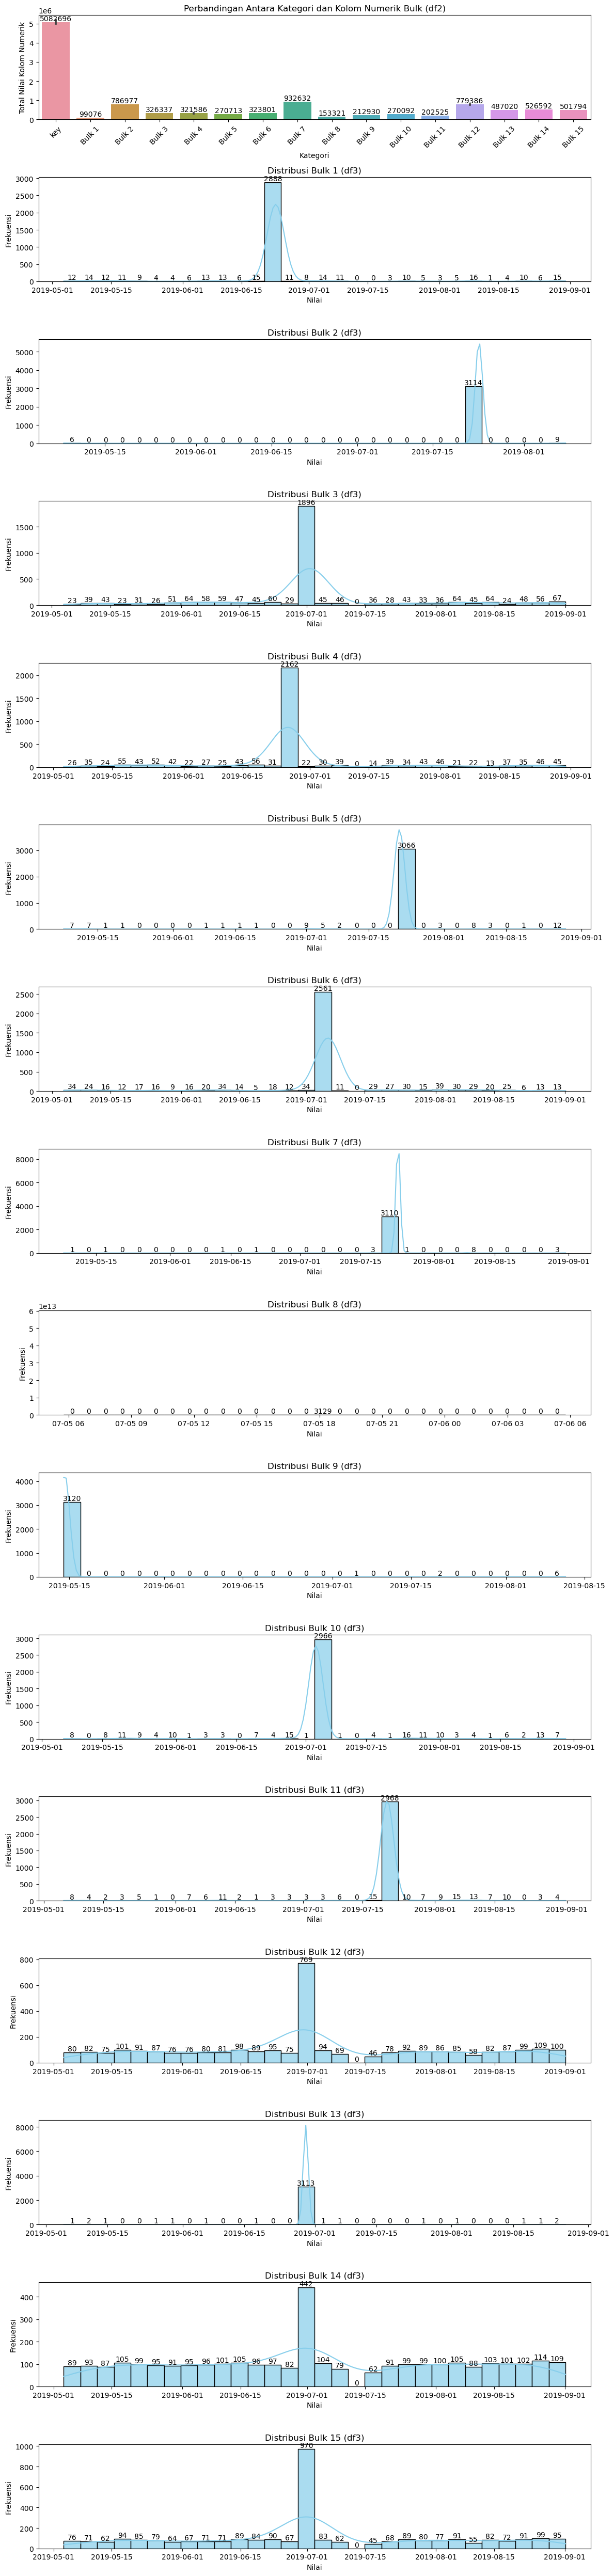

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Isi nilai yang hilang dengan nilai median
df2.fillna(df2.median(), inplace=True)
df3.fillna(df3.median(), inplace=True)

# Menggabungkan visualisasi EDA dari df2 dan df3 dalam satu gambar
fig, axes = plt.subplots(16, 1, figsize=(12, 50))  # Meningkatkan ukuran gambar untuk df3

# EDA visual untuk df2 (data_bulk_en.csv)
sns.barplot(data=df2, estimator=sum, dodge=True, ax=axes[0])
axes[0].set_title('Perbandingan Antara Kategori dan Kolom Numerik Bulk (df2)')
axes[0].set_xlabel('Kategori')
axes[0].set_ylabel('Total Nilai Kolom Numerik')
axes[0].tick_params(axis='x', rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan anotasi untuk setiap bar pada subplot pertama
for patch in axes[0].patches:
    axes[0].annotate(str(int(patch.get_height())), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                     ha='center', va='bottom')

# EDA visual untuk df3 (data_bulk_time_en.csv) Bulk 1 hingga 15
for i in range(1, 16):
    sns.histplot(data=df3[f'Bulk {i}'], bins=30, kde=True, color='skyblue', ax=axes[i], alpha=0.7)  # Mengurangi opacity (alpha)
    axes[i].set_title(f'Distribusi Bulk {i} (df3)')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Frekuensi')

    # Menambahkan anotasi untuk setiap bin pada histogram
    for patch in axes[i].patches:
        axes[i].annotate(str(int(patch.get_height())), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                         ha='center', va='bottom')

# Menampilkan gambar
plt.tight_layout()
plt.show()

Gambar tersebut menunjukkan perbandingan jumlah bulk di 15 kategori (Bulk 1 - Bulk 15) dan distribusi nilai total kolom numerik di Bulk 1 - Bulk 15. TDimana distribusi data Bulk 8 adalah yang tidak terlihat, dikarenkanan banyaknya nilai 0. Data tersebut dihimpun dari 2019-05-01 hingga 2019-09-01.

#### 1.3.3 Data Gas

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


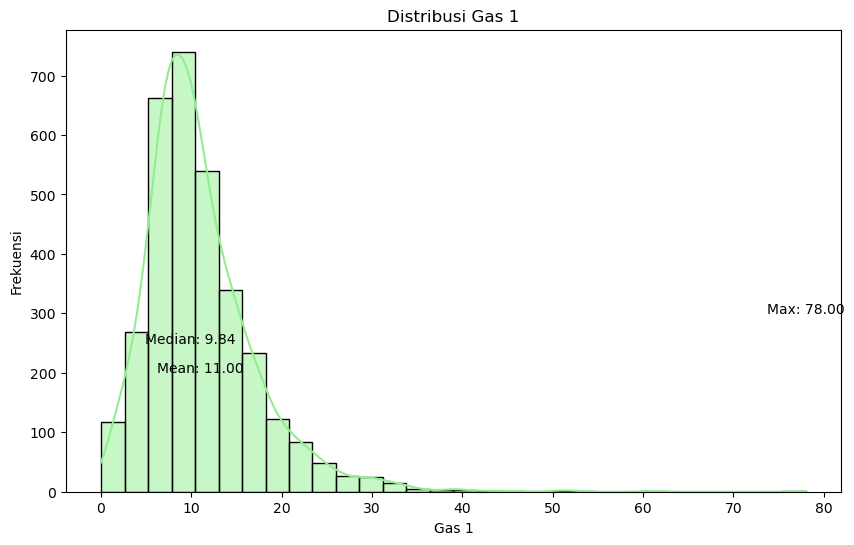

In [51]:
# EDA visual untuk df4 (data_gas_en.csv)
plt.figure(figsize=(10, 6))
sns.histplot(data=df4['Gas 1'], bins=30, kde=True, color='lightgreen')
plt.title('Distribusi Gas 1')
plt.xlabel('Gas 1')
plt.ylabel('Frekuensi')

# Menambahkan anotasi
mean_value = df4['Gas 1'].mean()
median_value = df4['Gas 1'].median()
max_value = df4['Gas 1'].max()

plt.text(mean_value, 200, f'Mean: {mean_value:.2f}', fontsize=10, ha='center')
plt.text(median_value, 250, f'Median: {median_value:.2f}', fontsize=10, ha='center')
plt.text(max_value, 300, f'Max: {max_value:.2f}', fontsize=10, ha='center')

plt.show()

Gambar tersebut menunjukkan distribusi gas 1 yang tidak simetris, dengan mayoritas sampel memiliki nilai rendah (frekuensi tertinggi di sekitar 10) dan beberapa sampel memiliki nilai sangat tinggi (hingga 78). Nilai maksimum gas 1 adalah 78.00, mediannya 9.84, dan rata-ratanya 11.00.

#### 1.3.4 Data Temp

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


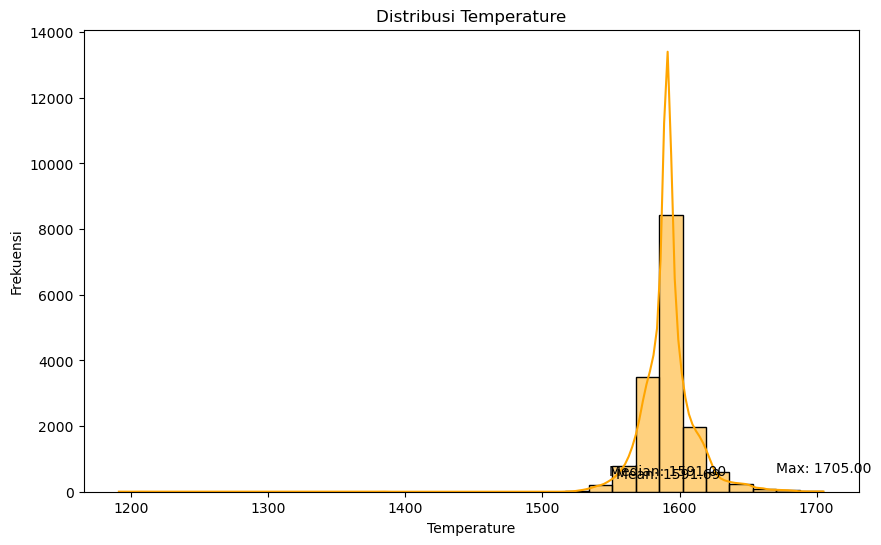

In [52]:
# EDA visual untuk df5 (data_temp_en.csv)
plt.figure(figsize=(10, 6))
sns.histplot(data=df5['Temperature'], bins=30, kde=True, color='orange')
plt.title('Distribusi Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frekuensi')

# Menambahkan anotasi
mean_value = df5['Temperature'].mean()
median_value = df5['Temperature'].median()
max_value = df5['Temperature'].max()

plt.text(mean_value, 400, f'Mean: {mean_value:.2f}', fontsize=10, ha='center')
plt.text(median_value, 500, f'Median: {median_value:.2f}', fontsize=10, ha='center')
plt.text(max_value, 600, f'Max: {max_value:.2f}', fontsize=10, ha='center')

plt.show()

Gambar tersebut menunjukkan bahwa temperatur di ruangan tersebut bervariasi, dengan sebagian besar data temperatur berada di sekitar nilai median 1591. Distribusi temperatur tidak simetris, dengan lebih banyak data di bawah nilai median dibandingkan di atasnya.

#### 1.3.5 Data Wire

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

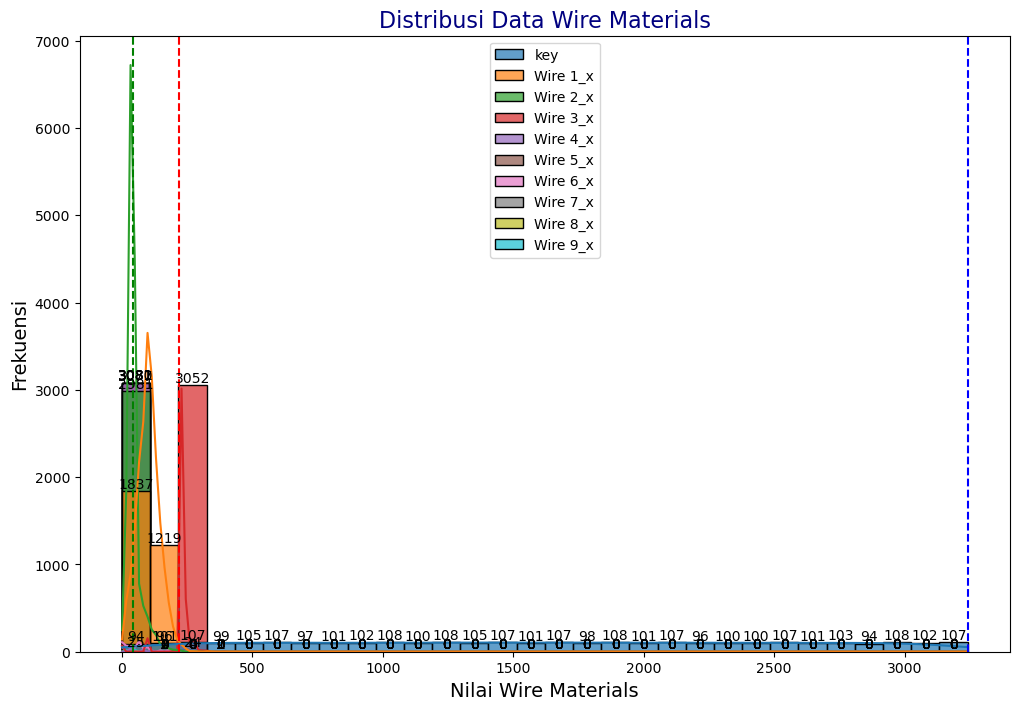

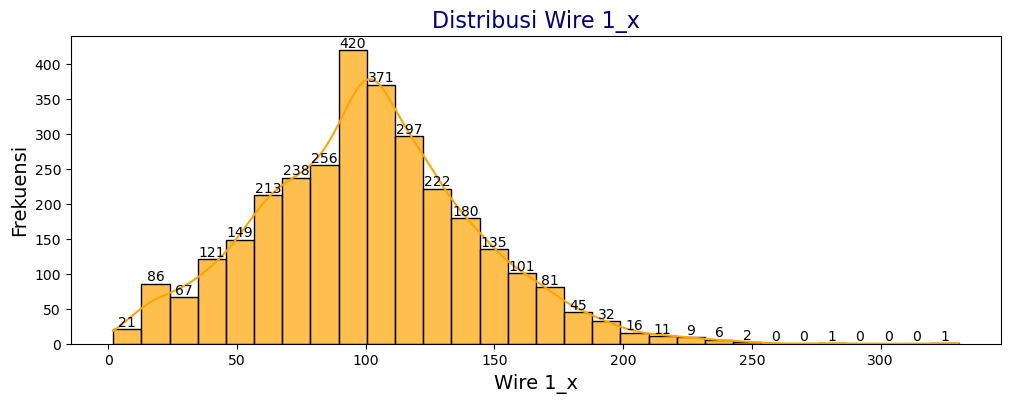

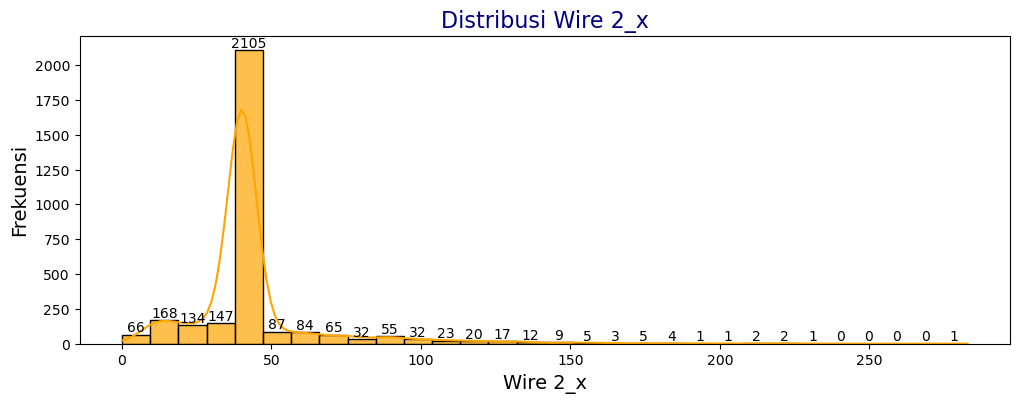

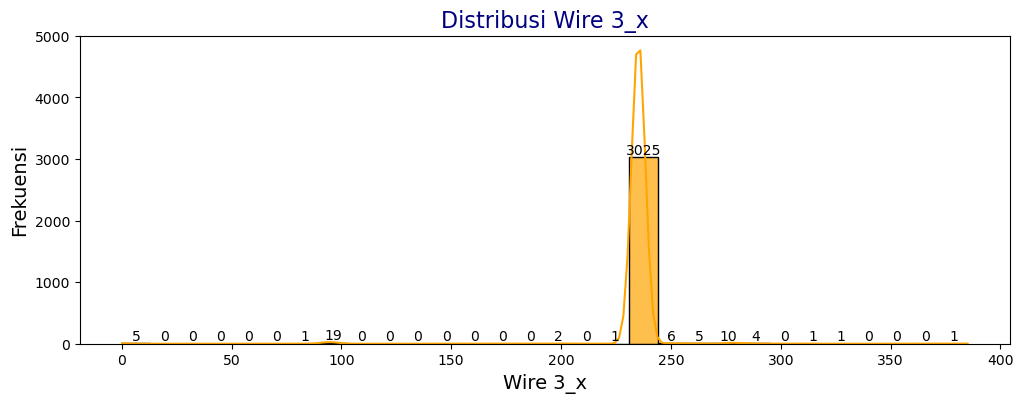

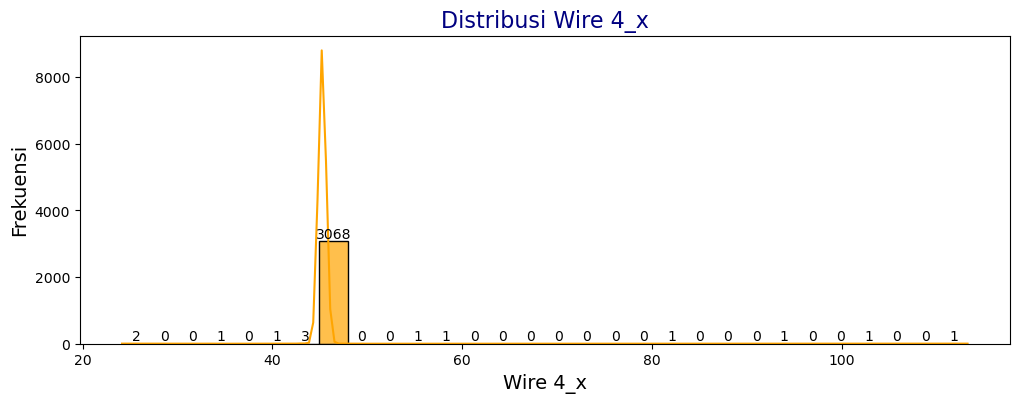

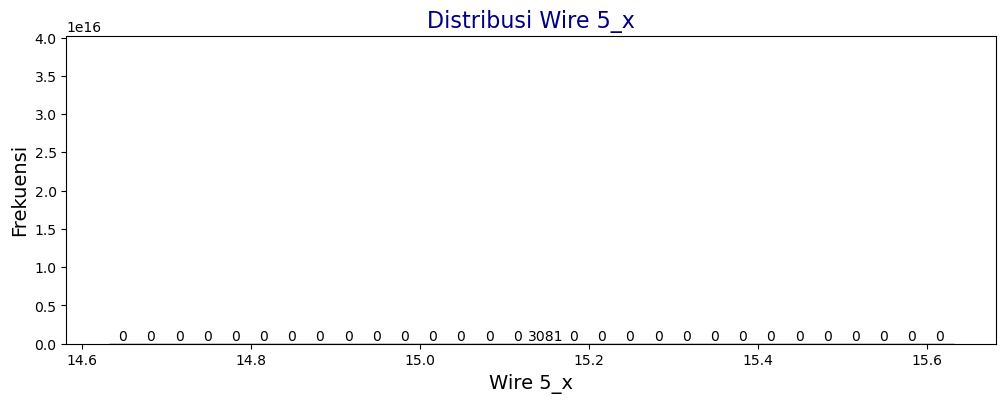

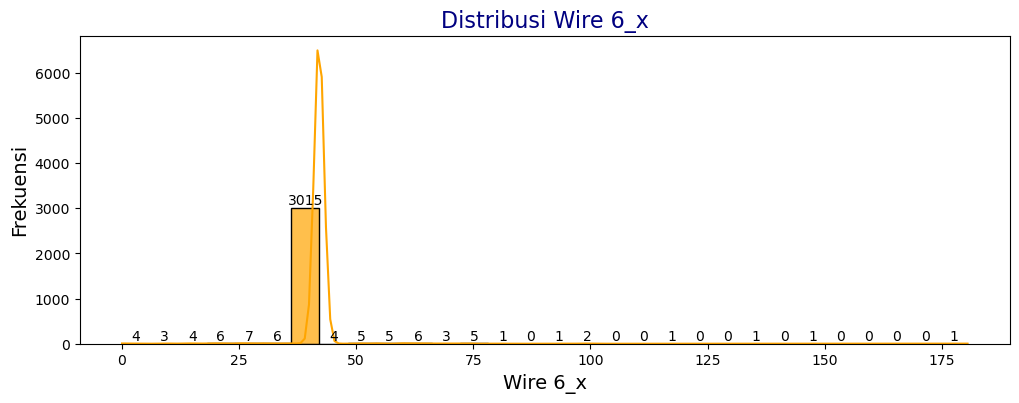

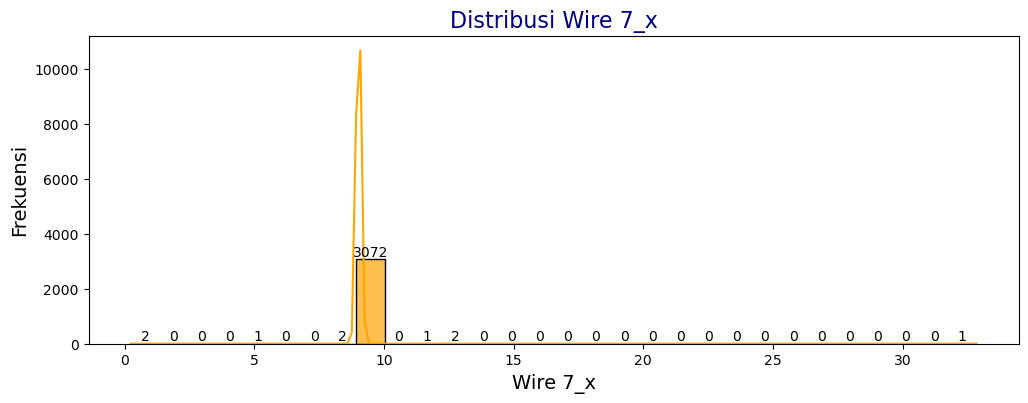

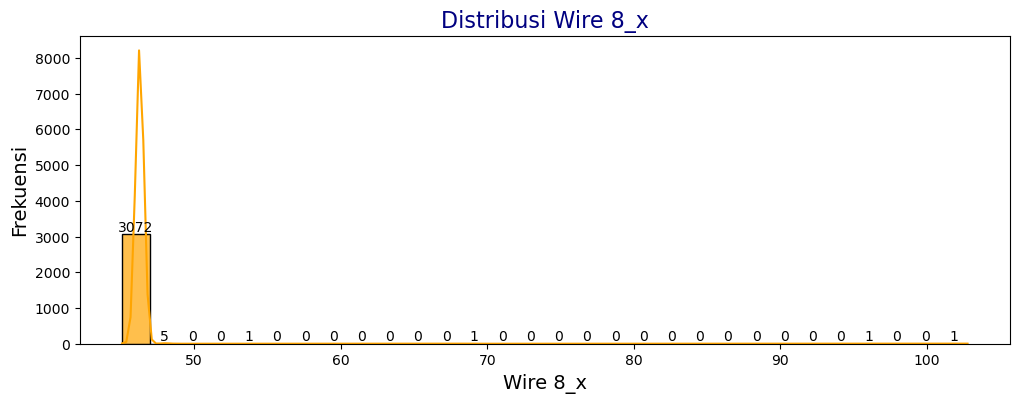

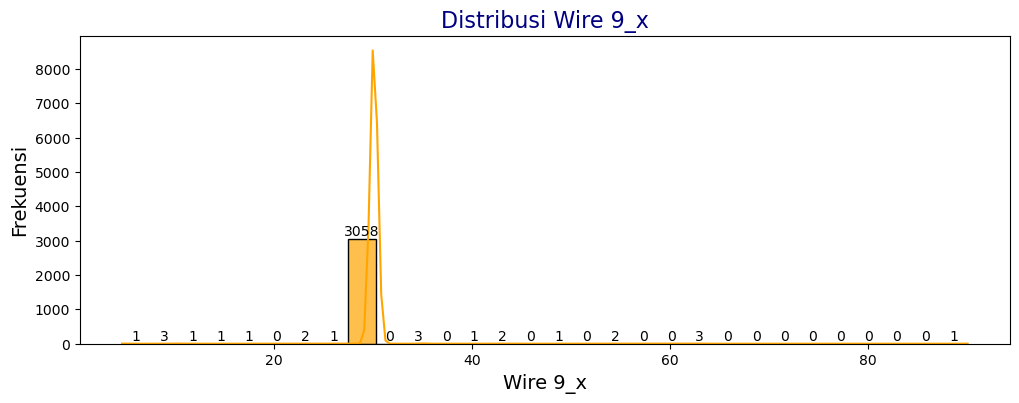

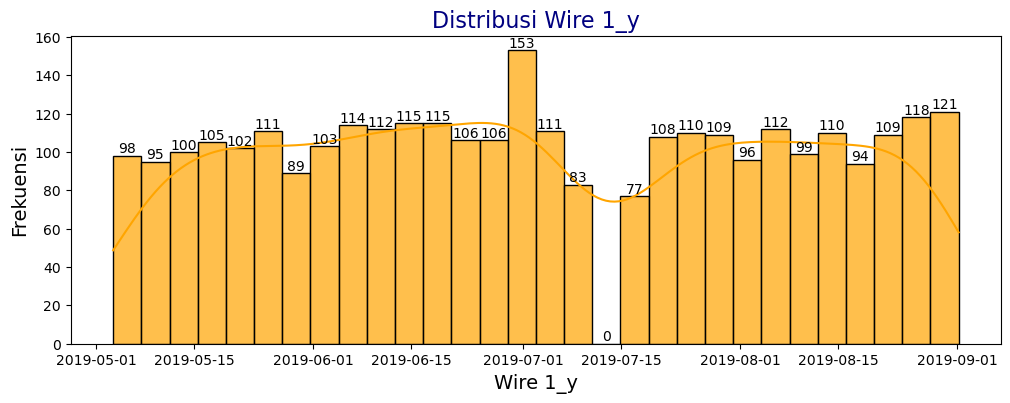

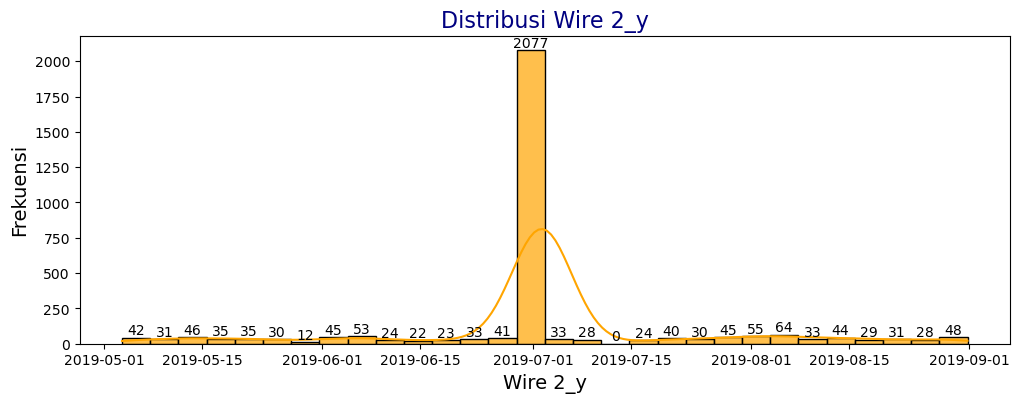

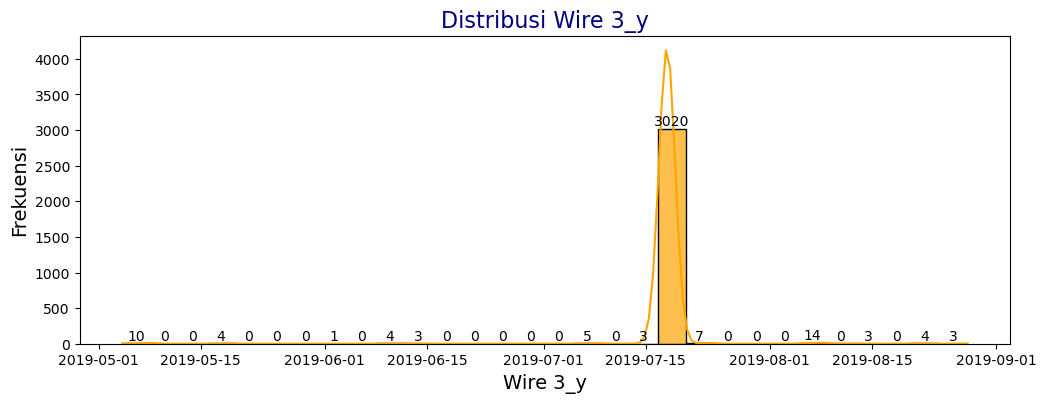

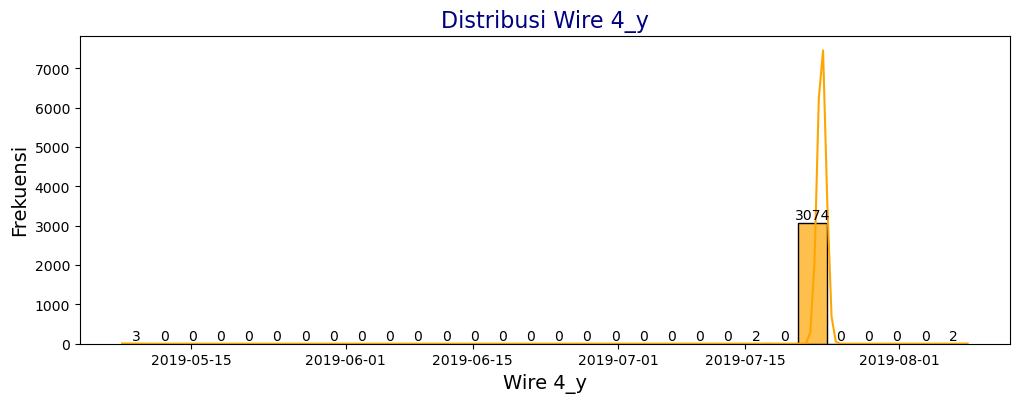

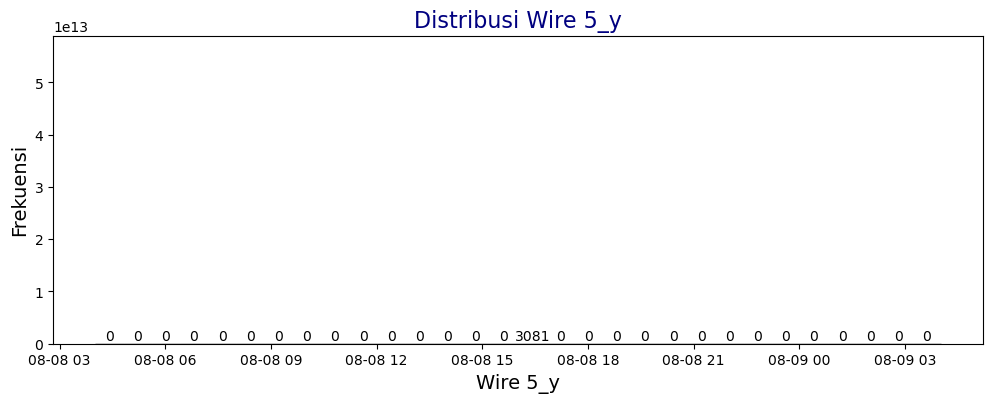

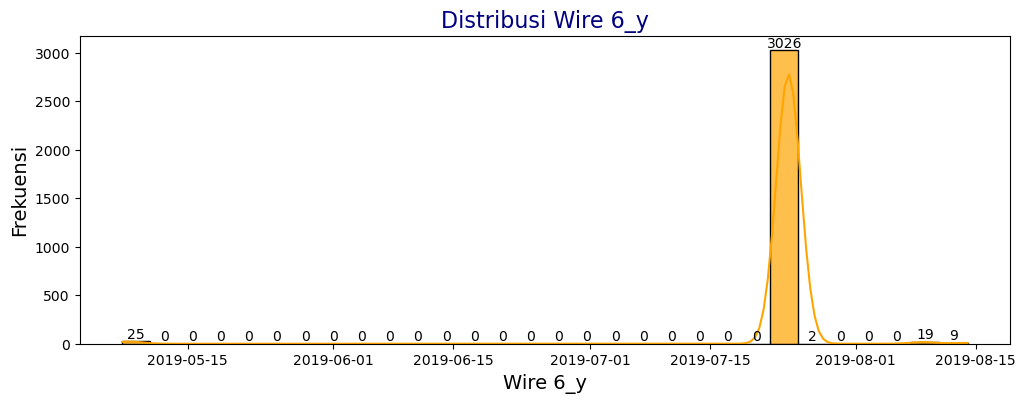

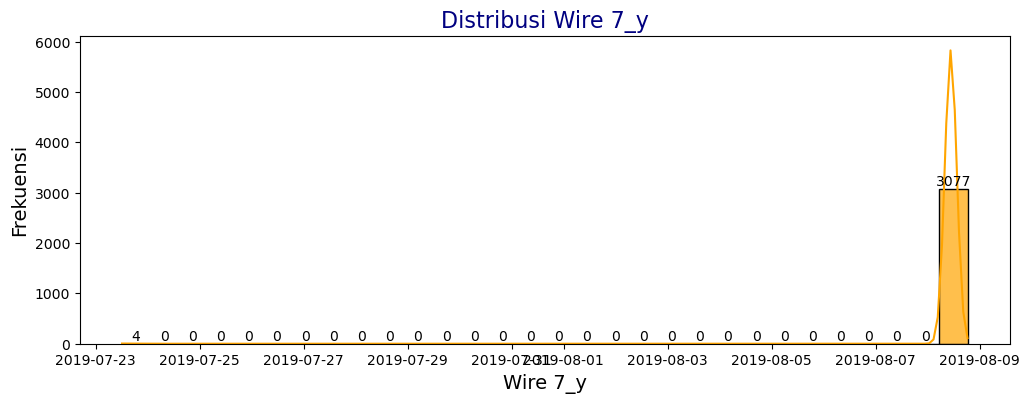

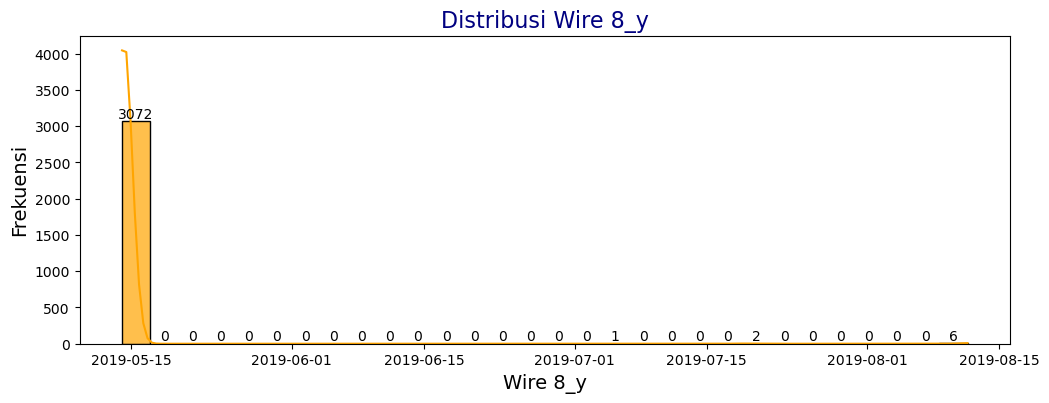

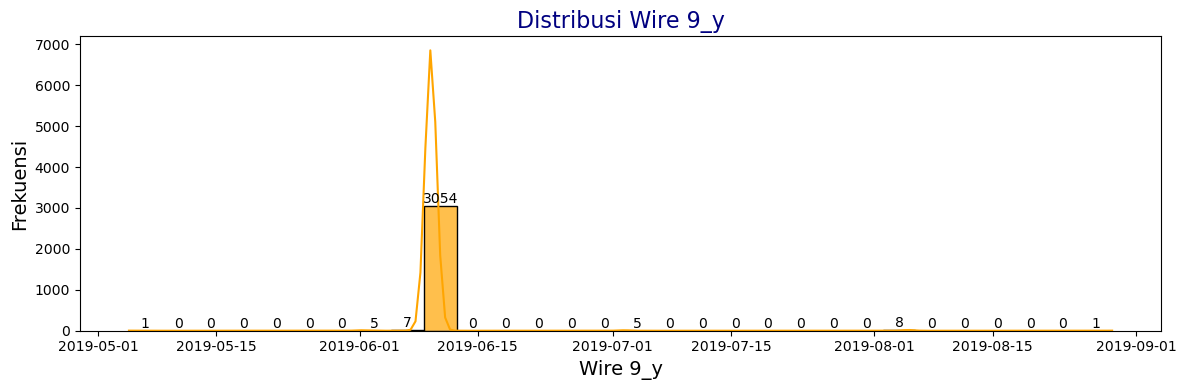

In [53]:
# Gabungkan df6 dan df7 berdasarkan kolom 'key'
df6_7 = pd.merge(df6, df7, on='key')

# Identifikasi kolom-kolom numerik
numeric_columns = df6_7.select_dtypes(include=[float, int]).columns

# Plotting EDA visual untuk df6 dan df7
plt.figure(figsize=(12, 8))
sns.histplot(data=df6_7[numeric_columns], bins=30, kde=True, color='purple', alpha=0.7)
plt.title('Distribusi Data Wire Materials', fontsize=16, color='navy')
plt.xlabel('Nilai Wire Materials', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Menambahkan anotasi untuk setiap bin
for patch in plt.gca().patches:
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), 
             str(int(patch.get_height())), ha='center', va='bottom', fontsize=10)

# Menghitung nilai mean, median, dan max dari kolom-kolom numerik
mean_value = df6_7[numeric_columns].mean().mean()
median_value = df6_7[numeric_columns].median().median()
max_value = df6_7[numeric_columns].max().max()

# Menambahkan garis putus-putus vertikal dan label untuk mean, median, dan max
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
plt.axvline(max_value, color='blue', linestyle='--', label=f'Max: {max_value:.2f}')

# Plotting distribusi kolom Wire 1 - Wire 15 dari df6_7
for column in df6_7.columns:
    if 'Wire' in column:
        plt.figure(figsize=(12, 4))
        sns.histplot(data=df6_7[column], bins=30, kde=True, color='orange', alpha=0.7)
        plt.title(f'Distribusi {column}', fontsize=16, color='navy')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frekuensi', fontsize=14)

        # Menambahkan anotasi untuk setiap bin pada distribusi kolom Wire
        for patch in plt.gca().patches:
            plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), 
                     str(int(patch.get_height())), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Gambar tersebut menunjukkan bahwa sebagian besar sampel memiliki nilai material kawat antara 100 dan 150. Ada beberapa sampel dengan nilai material kawat yang lebih rendah, dan beberapa sampel dengan nilai material kawat yang lebih tinggi.

List Question:

- Apakah setelah ini menghapus outlier setiap data?
- Dan setelah menghapus outlier, mulai menyiapkan data train dan test?
- Kemudian melakukan Machine Learning?

## 2. Menyiapkan Data Train dan Data Test

Setelah kita sebelumnya sudah melakukan pemberihan pada pada dataframe `df1 hingga df7` dan kita sudah melakukan EDA untuk mengecek secara visual. Selanjutnya kita akan menyiapkan Data Train dan Data Test, dengan menggabungkan data `df1 - df7`, dengan perbandingan `data train = 75% dan data test = 25%`. Dan untuk tahap pertama, kita tidak akan menghapus outlier. Dengan target dan fiturnya adalah suhu terukur terakhir maka kita akan menggunakan kolom `Temperature`. Kita juga akan menghapus kolom data yang bertipe `datetime`, karena untuk pengecekan MAE pada fitur dan target `Temperature`, tidak diperlukan data bertipe `datetime`. Dan kita melakukan aggregat data `df1 - df7` sebelum penggabungan data, menggunakan `aggregate median` karena median lebih tahan terhadap outlier dikarenakan kita juga tidak melakukan penghapusan outlier.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to aggregate and clean data
def aggregate_and_clean(df_list):
    # Aggregate dataframes
    df_agg_list = []
    for df in df_list:
        df_agg = df.groupby('key').agg('median').reset_index()
        df_agg_list.append(df_agg)
    
    # Merge aggregated dataframes
    df_combined = df_agg_list[0]
    for i in range(1, len(df_agg_list)):
        df_combined = df_combined.merge(df_agg_list[i], on='key')
    
    # Remove datetime columns if present
    datetime_columns = df_combined.select_dtypes(include=['datetime64']).columns
    if not datetime_columns.empty:
        df_combined.drop(columns=datetime_columns, inplace=True)
    
    return df_combined

# Aggregate and clean the data
df_list = [df1, df2, df3, df4, df5, df6, df7]
df_combined = aggregate_and_clean(df_list)

# Define features (X) and target (y)
X = df_combined.drop(columns=['Temperature'])  # Features
y = df_combined['Temperature']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the sizes of the training and testing data
print("Training data size:", X_train.shape, y_train.shape)
print("Testing data size:", X_test.shape, y_test.shape)


Training data size: (2266, 28) (2266,)
Testing data size: (756, 28) (756,)


In [55]:
df_combined

,key,Active power,Reactive power,Bulk 1_x,Bulk 2_x,Bulk 3_x,Bulk 4_x,Bulk 5_x,Bulk 6_x,Bulk 7_x,...,Temperature,Wire 1_x,Wire 2_x,Wire 3_x,Wire 4_x,Wire 5_x,Wire 6_x,Wire 7_x,Wire 8_x,Wire 9_x
0,1,0.805607,0.520285,31.0,251.5,97.5,43.0,86.0,100.0,298.0,...,1604.0,60.059998,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
1,2,0.659060,0.411077,31.0,251.5,97.5,73.0,86.0,100.0,298.0,...,1595.5,96.052315,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
2,3,0.429355,0.271774,31.0,251.5,97.5,34.0,86.0,100.0,298.0,...,1598.0,91.160157,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
3,4,0.781301,0.518548,31.0,251.5,97.5,81.0,86.0,100.0,298.0,...,1623.0,89.063515,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
4,5,0.729026,0.511438,31.0,251.5,97.5,78.0,86.0,100.0,298.0,...,1589.0,89.238236,9.114560,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,3237,0.801703,0.554933,31.0,251.5,170.0,102.0,86.0,100.0,298.0,...,1591.0,38.088959,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
3018,3238,0.717559,0.520623,31.0,251.5,126.0,102.0,86.0,100.0,298.0,...,1591.0,56.128799,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
3019,3239,0.500244,0.360726,31.0,251.5,97.5,102.0,86.0,114.0,298.0,...,1591.0,143.357761,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
3020,3240,0.521811,0.416994,31.0,251.5,97.5,102.0,86.0,26.0,298.0,...,1591.0,34.070400,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399


In [56]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             3022 non-null   int64  
 1   Active power    3022 non-null   float64
 2   Reactive power  3022 non-null   float64
 3   Bulk 1_x        3022 non-null   float64
 4   Bulk 2_x        3022 non-null   float64
 5   Bulk 3_x        3022 non-null   float64
 6   Bulk 4_x        3022 non-null   float64
 7   Bulk 5_x        3022 non-null   float64
 8   Bulk 6_x        3022 non-null   float64
 9   Bulk 7_x        3022 non-null   float64
 10  Bulk 8_x        3022 non-null   float64
 11  Bulk 9_x        3022 non-null   float64
 12  Bulk 10_x       3022 non-null   float64
 13  Bulk 11_x       3022 non-null   float64
 14  Bulk 12_x       3022 non-null   float64
 15  Bulk 13_x       3022 non-null   float64
 16  Bulk 14_x       3022 non-null   float64
 17  Bulk 15_x       3022 non-null   f

Maka, dari hasil data train dan data test didapatkan:

- Ukuran data train menunjukkan 2266 baris dan 28 kolom fitur, dengan jumlah nilai target yang sama.
- Ukuran data test menunjukkan 756 baris dan 28 kolom fitur, dengan jumlah nilai target yang sama.

Kita lanjutkan dengan pemodelan dimana kita akan menggunakan pemodelan.


### 3. Pemodelan Data

Kita lanjutkan dengan Pelatihan Model dimana sebelumnya kita sudah memisahkan data 75% data latih dan 25% data uji.

Dalam pelatihan model kita akan menggunakan perbandingan 3 pelatihan model sebagai perbandingan.

- Decision Tree
- Random Forest
- Gradient Boosting Machines (GBM)

Dan kita akan focus ke MAE score.

#### 3.1 Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

# Prediksi nilai target untuk data pengujian
y_pred = model.predict(X_test)

# Hitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 9.400132275132275


Nilai MAE dari `Decision Tree Regressor` saat ini adalah `9.40`. Masih di atas standar minimal.

#### 3.2 Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)

# Latih model dengan data pelatihan
model_rf.fit(X_train, y_train)

# Prediksi nilai target untuk data pengujian
y_pred_rf = model_rf.predict(X_test)

# Hitung Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE) dengan RandomForestRegressor:", mae_rf)

Mean Absolute Error (MAE) dengan RandomForestRegressor: 6.522929894179893


Kita mendapatkan nilai MAE dari `Random Forest Regressor` saat ini adalah `6.52`. Sudah memenuhi standar MAE. Namun, kita kan compare lagi dahulu dengan model lain.

#### 3.3 Gradient Boosting Machines (GBM)

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model GradientBoostingRegressor
model_gbm = GradientBoostingRegressor(random_state=42)

# Latih model dengan data pelatihan
model_gbm.fit(X_train, y_train)

# Prediksi nilai target untuk data pengujian
y_pred_gbm = model_gbm.predict(X_test)

# Hitung Mean Absolute Error (MAE)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
print("Mean Absolute Error (MAE) dengan GradientBoostingRegressor:", mae_gbm)

Mean Absolute Error (MAE) dengan GradientBoostingRegressor: 6.894469319479193


Dari GBM kita dapatkan nilai MAE `6.89`. Dan dari ketiga model, didapatkan nilai MAE terbaik adalah dengan model `Random Forest` yaitu `6.52`. Kita akan menambahkan hyperparameter pada `Random Forest` untuk mengecek apakah bisa mendapatkan nilai MAE yang lebih rendah.

#### 3.4 Random Forest Regressor dengan Hyperparameter

In [60]:
from sklearn.metrics import mean_absolute_error

# Inisialisasi model RandomForestRegressor dengan hyperparameter yang disesuaikan
model_rf = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)

# Latih model dengan data pelatihan
model_rf.fit(X_train, y_train)

# Prediksi nilai target untuk data pengujian
y_pred_rf = model_rf.predict(X_test)

# Hitung Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE) dengan RandomForestRegressor:", mae_rf)

Mean Absolute Error (MAE) dengan RandomForestRegressor: 6.428443973107668


Setelah kita setup `Random Forest` dengan hyperparameternya `n_estimators=500, max_depth=20, min_samples_split=5`, nilai MAE turun menjadi `6.43`, ini adalah nilai terbaik saat ini yang kita dapatkan.

Selanjutnya, kita akan melakukan penggabungan `data train dan data test` sebelum kita lakukan `test data`.

In [61]:
# Jumlah data train
num_train_samples = X_train.shape[0]

# Jumlah data test
num_test_samples = X_test.shape[0]

# Gabungkan data X_train dan X_test
X_combined = pd.concat([X_train, X_test], axis=0)

# Gabungkan data y_train dan y_test
y_combined = pd.concat([y_train, y_test], axis=0)

# Jumlah data gabungan
num_combined_samples = X_combined.shape[0]

# Jumlah kolom setelah penggabungan
num_columns = X_combined.shape[1]

# Nama kolom
column_names = X_combined.columns.tolist()

# Menampilkan hasil
print("Jumlah data train:", num_train_samples)
print("Jumlah data test:", num_test_samples)
print("Jumlah data gabungan:", num_combined_samples)
print("Jumlah kolom setelah penggabungan:", num_columns)
print("Nama kolom:", column_names)

Jumlah data train: 2266
Jumlah data test: 756
Jumlah data gabungan: 3022
Jumlah kolom setelah penggabungan: 28
Nama kolom: ['key', 'Active power', 'Reactive power', 'Bulk 1_x', 'Bulk 2_x', 'Bulk 3_x', 'Bulk 4_x', 'Bulk 5_x', 'Bulk 6_x', 'Bulk 7_x', 'Bulk 8_x', 'Bulk 9_x', 'Bulk 10_x', 'Bulk 11_x', 'Bulk 12_x', 'Bulk 13_x', 'Bulk 14_x', 'Bulk 15_x', 'Gas 1', 'Wire 1_x', 'Wire 2_x', 'Wire 3_x', 'Wire 4_x', 'Wire 5_x', 'Wire 6_x', 'Wire 7_x', 'Wire 8_x', 'Wire 9_x']


Dari penggabungan data, kita sudah mendapatkan penjelasan untuk jumlah data train `2266`, jumlah data test `756`, jumlah data gabungan `3022`, serta jumlah kolom `28`, dengan nama kolom terlampir di atas. Maka, penggabungan data sudah sesuai. Kita lanjutkan ke bagian test data.

### 4. Test Data

Tahap selanjutnya, kita akan melakukan`Test Data` sesuai dengan model terbaik yang kita dapatkan sebelumnya yaitu `Random Forest Regressor dengan Hyperparameter`.

In [62]:
# Gabungkan data X_train dan X_test
X_combined = pd.concat([X_train, X_test], axis=0)

# Gabungkan data y_train dan y_test
y_combined = pd.concat([y_train, y_test], axis=0)

# Inisialisasi model RandomForestRegressor dengan hyperparameter yang disesuaikan
model_rf = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)

# Latih model dengan data pelatihan
model_rf.fit(X_combined, y_combined)

# Prediksi nilai target untuk data pengujian
y_pred_rf = model_rf.predict(X_combined)

# Hitung Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_combined, y_pred_rf)
print("Mean Absolute Error (MAE) dengan RandomForestRegressor:", mae_rf)

Mean Absolute Error (MAE) dengan RandomForestRegressor: 3.126808082468086


Setelah kita lakukan penggabungan `data test dan data train`, dan menggunakan pemodelan `Random Forest Regressor dengan Hyperparameter` kita mendapatkan nilai MAE `3.13`. Nilai MAE ini sudah jauh lebih baik dari sebelumnya, dan ini menunjukakn bahwa kualitas data mempunyai performa yang baik.

Kita akan melakukan pengecekan MAE, pada prediksi pada dataset test.

In [63]:
# Prediksi nilai target untuk dataset test
y_pred_test = model_rf.predict(X_test)

# Hitung Mean Absolute Error (MAE) untuk dataset test
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) pada dataset test:", mae_test)

Mean Absolute Error (MAE) pada dataset test: 3.006134227586219


Ternyata performa dari dataset test, memiliki performa yang baik dengan nilai MAE `3.00`. Kita cek juga tampilan prediksinya dengan kita compare dengan nilai aktual.

In [64]:
# Membuat DataFrame untuk menampilkan hasil prediksi dan nilai sebenarnya dari dataset uji
df_pred_actual = pd.DataFrame({'Predicted': y_pred_test, 'Actual': y_test})

# Menampilkan beberapa baris pertama dari DataFrame
print("Prediksi dan Nilai Sebenarnya dari Dataset Test:")
print(df_pred_actual.head())

Prediksi dan Nilai Sebenarnya dari Dataset Test:
        Predicted  Actual
1413  1577.690033  1575.0
612   1590.590819  1587.0
331   1590.558227  1587.5
211   1580.034779  1576.0
52    1585.356931  1586.0


Dalam beberapa hasil di atas, terlihat bahwa model melakukan `prediksi yang baik` karena selisih antara nilai prediksi dan nilai sebenarnya relatif kecil. Sehingga, `data yang sudah kita olah ini sudah sesuai dengan assesment criteria`.

### 5. Kesimpulan Umum

Dari project ini, sebelumnya kita sudah melakukan beberapa tahap yaitu `Persiapan Dataset`, `Melakukan Pre-Processing`, `Melakukan Pemodelan Data dengan 3 model`, `Melakukan Test Data dengan Penggabungan Data Train dan Data Test`, dan `Didapatkan hasil pengecekan nilai prediksi dan nilai aktual`. Sehingga, dapat kita dapatkan kesimpulan sebagai berikut:


Berdasarkan rencana kerja, langkah-langkah yang telah kita lakukan adalah:

**1. Memuat Dataset:**
   
Dimana dataset terdiri dari 7 data, dan mempunyai fitur dan target masing-masing.
Dan ditemukan beberapa nilai yang hilang pada beberapa data yaitu di `df2, df3, df5, df6, dan df7`.

**2. Pre-processing data:**

Melakukan pembersihan data dari nilai yang hilang, dengan mengisi nilai yang hilang menggunakan median. Dikarenakan banyak juga nilai yang terisi dengan nilai 0, yang mana jika diisi dengan nilai 0, akan menghasilkan ketidakstabilan numerik saat dilakukan pemodelan.
Dimana, ini menjadi tantangan tersendiri juga, saat harus juga merubah tipedata, terkadang tidak match saat diisi dengan median. Jadi, perlu dilakukan sequence pembersihan dengan benar. Dan kita tidak melakukan penghapusan outlier dikarenakan, setelah data yang diisi dengan median, data sudah terlihat akurat.

**3. Ekxploratori Data Analisis (EDA):**

Kita melakukan EDA untuk mengecek tampilan data secara visual, dan kesemuanya kita menggunakan tipe bar plot dan histogram, untuk mengetahui kemudahan distribusi data. Adapun, data yang kita gabungkan untuk mengecek EDAnya adalah data `df2 dengan df3` dan `df6 dengan df7`, karena mempunyai korelasi dengan tanggal.

**4. Pemodelan Data:**

Ditahap ini kita menyiapkan data train dan data test dengan komposisi `75% untuk data train, dan 25% untuk data test`, dan juga kita melakukan proses aggregat median pada kolom key, agar tidak adanya duplikat pada kolom, dan tidak kita lakukan juga penghapusan outlier, dan didapatkanlah `df_combined` dengan detail:
- Ukuran data train menunjukkan 2266 baris dan 28 kolom fitur, dengan jumlah nilai target yang sama.
- Ukuran data test menunjukkan 756 baris dan 28 kolom fitur, dengan jumlah nilai target yang sama.

Untuk Pemodelan Datanya, kita menggunakan Pemodelan Machine Learning yang cocok untuk Regresi dan tahan terhadap outlier yaitu:
- Decision Tree
- Random Forest
- Gradient Boosting Machines (GBM)
- Random Forest Regressor dengan Hyperparameter.

Dengan pengecekan MAE, dikarenakan MAE tidak terlali terpengaruh oleh outlier dan juga untuk mengecek kesalahan absolut apakah terjadi atau tidak.

Dan dihasilkan nilai MAE Berikut:
- Decision Tree >`MAE 9.40`
- Random Forest > `MAE 6.52`
- Gradient Boosting Machines (GBM) > `MAE 6.89`
- Random Forest Regressor dengan Hyperparamter > `MAE 6.43`

Maka, hasil pemodelan ML terbaik ada pada Random Forest Regressor dengan Hyperparameter > `MAE 6.43`.

**5. Test Data**

Kita lanjutkan melakukan penggabungan data train dan data test dan didapatkan hasil berikut:

- Jumlah data train: 2266
- Jumlah data test: 756
- Jumlah data gabungan: 3022
- Jumlah kolom setelah penggabungan: 28

- Dan kita lanjutkan melakukan pengecekan MAE pada data gabungan dengan model ML terbaik yaitu Random Forest Regressor dengan Hyperparameter didapatkan `MAE 3.12`.

- Dilanjutkan dengan mengecek prediksi hasil data test, didapatkan nilai `MAE 3.00`.

- Terakhir kita cek tampilan perbandingan hasil prediksi dengan hasil sebenarnya, didapatkan berikut:

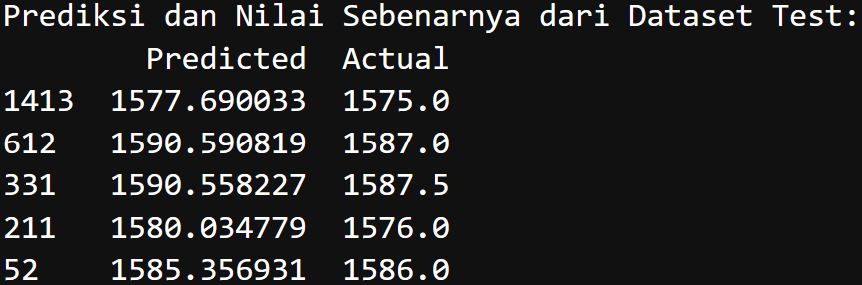

Dan dari hasil akhir pengecekan ini maka, data yang kita proses mempunyai selisih antara prediksi dengan aktual yang tidak banyak, artinya performa prediksi baik, dan juga data sudah memenuhi assesment criteria dengan baik.

Sehingga hasil akhir yang diperoleh adalah `MAE 3.12` dengan pemodelan ML `Random Forest Regressor dengan Hyperparameter`.